In [228]:
# Import Libraries

import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [229]:
#pip install openpyxl

In [230]:
schiphol_airport_df = pd.read_excel("Amsterdam_Airport.xlsx")
schiphol_airport_df.head()


,Periods,Aircraft movements Cross-country flights,Aircraft movements Local flights,Total flights,Total arrivals flights,Total departures flights,Total passengers,Total arrivals passengers,Total departures passengers,Passengers EU countries,...,Passengers South America,Passengers Asia,Passengers West Asia,Passengers South-East Asia,Total cargo,Total unloaded cargo,Total loaded cargo,Total mail,Total unloaded mail,Total loaded mail
0,2019 January,38009,515,37185,18588,18597,4996131,2520292,2475839,2856935,...,145444,600706,197945,198530,122643,63750,58894,1615,560,1055
1,2019 February,36127,434,35195,17590,17605,4836332,2386195,2450137,2874499,...,131436,552485,190308,171647,115797,57320,58476,1398,485,913
2,2019 March,40748,480,39785,19897,19888,5630314,2847589,2782725,3361481,...,139239,604250,215944,178766,144773,72679,72094,1761,705,1056
3,2019 April,42976,564,41892,20940,20952,6104010,2983771,3120239,3657659,...,134535,618238,223839,153991,126743,64164,62578,1747,707,1040
4,2019 May,45990,521,44706,22352,22354,6441473,3236047,3205426,3931201,...,131945,583271,199898,132977,133648,65668,67980,1860,796,1064


In [231]:
schiphol_airport_df.shape

(60, 30)

In [232]:
#standardized column names will be meaninfull strings, lower case and with '_' instead of

schiphol_airport_df.columns = [col.lower().replace(' ', '_') for col in schiphol_airport_df.columns]

schiphol_airport_df.head(10)

,periods,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
0,2019 January,38009,515,37185,18588,18597,4996131,2520292,2475839,2856935,...,145444,600706,197945,198530,122643,63750,58894,1615,560,1055
1,2019 February,36127,434,35195,17590,17605,4836332,2386195,2450137,2874499,...,131436,552485,190308,171647,115797,57320,58476,1398,485,913
2,2019 March,40748,480,39785,19897,19888,5630314,2847589,2782725,3361481,...,139239,604250,215944,178766,144773,72679,72094,1761,705,1056
3,2019 April,42976,564,41892,20940,20952,6104010,2983771,3120239,3657659,...,134535,618238,223839,153991,126743,64164,62578,1747,707,1040
4,2019 May,45990,521,44706,22352,22354,6441473,3236047,3205426,3931201,...,131945,583271,199898,132977,133648,65668,67980,1860,796,1064
5,2019 June,44742,559,43348,21676,21672,6502588,3273870,3228718,3931186,...,129986,594586,214493,130830,123888,61724,62164,1736,722,1014
6,2019 July,45936,492,44736,22366,22370,6724023,3166610,3557413,3992902,...,145040,646520,243180,140403,129143,63515,65628,1876,797,1078
7,2019 August,46167,483,45122,22558,22564,6810759,3523240,3287519,4007196,...,143204,660383,251293,144489,130581,65711,64871,1774,723,1051
8,2019 September,45302,456,44131,22075,22056,6493468,3252568,3240900,3910988,...,130197,606741,214544,137525,136819,69627,67192,1747,735,1012
9,2019 October,45643,546,44502,22251,22251,6431122,3227860,3203262,3865499,...,139427,613174,225690,138445,143579,73464,70115,1974,824,1149


In [233]:
# assign a name to the index column
schiphol_airport_df.index.name = 'Serial_No'
schiphol_airport_df

,periods,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
Serial_No,,,,,,,,,,,,,,,,,,,,,
0,2019 January,38009,515,37185,18588,18597,4996131,2520292,2475839,2856935,...,145444,600706,197945,198530,122643,63750,58894,1615,560,1055
1,2019 February,36127,434,35195,17590,17605,4836332,2386195,2450137,2874499,...,131436,552485,190308,171647,115797,57320,58476,1398,485,913
2,2019 March,40748,480,39785,19897,19888,5630314,2847589,2782725,3361481,...,139239,604250,215944,178766,144773,72679,72094,1761,705,1056
3,2019 April,42976,564,41892,20940,20952,6104010,2983771,3120239,3657659,...,134535,618238,223839,153991,126743,64164,62578,1747,707,1040
4,2019 May,45990,521,44706,22352,22354,6441473,3236047,3205426,3931201,...,131945,583271,199898,132977,133648,65668,67980,1860,796,1064
5,2019 June,44742,559,43348,21676,21672,6502588,3273870,3228718,3931186,...,129986,594586,214493,130830,123888,61724,62164,1736,722,1014
6,2019 July,45936,492,44736,22366,22370,6724023,3166610,3557413,3992902,...,145040,646520,243180,140403,129143,63515,65628,1876,797,1078
7,2019 August,46167,483,45122,22558,22564,6810759,3523240,3287519,4007196,...,143204,660383,251293,144489,130581,65711,64871,1774,723,1051
8,2019 September,45302,456,44131,22075,22056,6493468,3252568,3240900,3910988,...,130197,606741,214544,137525,136819,69627,67192,1747,735,1012


In [234]:
# Replacing the 'periods' column name as 'period'

# For this we are defining a dictionary to specify the replacements
column_replacements = {
    'periods': 'period'
}

# Using lambda function we can replace the column names: 
schiphol_airport_df.rename(columns=lambda x: x.replace('_periods', '_period'), inplace=True)
schiphol_airport_df.rename(columns=column_replacements, inplace=True)

schiphol_airport_df

,period,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
Serial_No,,,,,,,,,,,,,,,,,,,,,
0,2019 January,38009,515,37185,18588,18597,4996131,2520292,2475839,2856935,...,145444,600706,197945,198530,122643,63750,58894,1615,560,1055
1,2019 February,36127,434,35195,17590,17605,4836332,2386195,2450137,2874499,...,131436,552485,190308,171647,115797,57320,58476,1398,485,913
2,2019 March,40748,480,39785,19897,19888,5630314,2847589,2782725,3361481,...,139239,604250,215944,178766,144773,72679,72094,1761,705,1056
3,2019 April,42976,564,41892,20940,20952,6104010,2983771,3120239,3657659,...,134535,618238,223839,153991,126743,64164,62578,1747,707,1040
4,2019 May,45990,521,44706,22352,22354,6441473,3236047,3205426,3931201,...,131945,583271,199898,132977,133648,65668,67980,1860,796,1064
5,2019 June,44742,559,43348,21676,21672,6502588,3273870,3228718,3931186,...,129986,594586,214493,130830,123888,61724,62164,1736,722,1014
6,2019 July,45936,492,44736,22366,22370,6724023,3166610,3557413,3992902,...,145040,646520,243180,140403,129143,63515,65628,1876,797,1078
7,2019 August,46167,483,45122,22558,22564,6810759,3523240,3287519,4007196,...,143204,660383,251293,144489,130581,65711,64871,1774,723,1051
8,2019 September,45302,456,44131,22075,22056,6493468,3252568,3240900,3910988,...,130197,606741,214544,137525,136819,69627,67192,1747,735,1012


In [235]:
# Get the data types of all columns in the DataFrame and checking whether we need to change the datatype of any column
column_data_types = schiphol_airport_df.dtypes

# Print the data types
print(column_data_types)

period                                       object
aircraft_movements_cross-country_flights      int64
aircraft_movements_local_flights              int64
total_flights                                 int64
total_arrivals_flights                        int64
total_departures_flights                      int64
total_passengers                              int64
total_arrivals_passengers                     int64
total_departures_passengers                   int64
passengers_eu_countries                       int64
passengers_other_europe                       int64
passengers_africa                             int64
passengers_north_africa                       int64
passengers_west_africa                        int64
passengers_central_africa                     int64
passengers_east_africa                        int64
passengers_south_africa                       int64
passengers_america                            int64
passengers_north_america                      int64
passengers_c

In [236]:

# Use try-except to handle missing month information
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y %B')
    except ValueError:
        return pd.NaT  # Set missing values to NaN

schiphol_airport_df['period'] = schiphol_airport_df['period'].apply(parse_date)



In [237]:
schiphol_airport_df['period'].dtype

dtype('<M8[ns]')

In [238]:
schiphol_airport_df.sample(5)

,period,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
Serial_No,,,,,,,,,,,,,,,,,,,,,
19,2020-07-01,16789,430,15702,7831,7871,1338857,608849,730008,938685,...,14651,78276,26724,25566,119634,62053,57581,1083,402,681
43,2022-05-01,40208,478,38419,19205,19214,5217035,2674745,2542290,2692816,...,130193,295318,167706,101792,119478,58583,60895,685,349,336
35,2021-10-01,33037,428,31324,15655,15669,3745991,1907661,1838330,2204098,...,92675,173355,104283,37117,149383,77326,72057,1040,579,461
26,2021-01-01,15181,458,14666,7317,7349,869129,463793,405336,396818,...,34301,77352,37553,22350,133222,72074,61148,1403,692,711
13,2020-01-01,38410,468,37567,18784,18783,5074773,2561003,2513770,2932396,...,146061,590799,216030,159427,113080,60639,52441,1908,777,1131


In [ ]:
#Below three 'change datatype' I may need it later, because of the datatype used for period column, couldnt do timeseries analysis here because ofsome error. so I may again try it later.

In [239]:

# Change data type of "Year" to datetime with year only
#schiphol_airport_df['year'] = pd.to_datetime(schiphol_airport_df['year'], format='%Y').dt.to_period('Y')
#schiphol_airport_df['year'].dtype

In [240]:
#Change data type of "Month" to datetime with month only
#schiphol_airport_df['month'] = pd.to_datetime(schiphol_airport_df['month'], format='%B').dt.to_period('M')
#schiphol_airport_df['month'].dtype

In [241]:
#schiphol_airport_df['month'] = pd.to_datetime(schiphol_airport_df['month'], format='%B').dt.strftime('%B').astype('period[M]')


In [242]:
# Identifying if there are any columns with null or missing values?
null_counts = schiphol_airport_df.isnull().sum()
print("Columns with Null Values:")
display(null_counts)

Columns with Null Values:


period                                       4
aircraft_movements_cross-country_flights     0
aircraft_movements_local_flights             0
total_flights                                0
total_arrivals_flights                       0
total_departures_flights                     0
total_passengers                             0
total_arrivals_passengers                    0
total_departures_passengers                  0
passengers_eu_countries                      0
passengers_other_europe                      0
passengers_africa                            0
passengers_north_africa                      0
passengers_west_africa                       0
passengers_central_africa                    0
passengers_east_africa                       0
passengers_south_africa                      0
passengers_america                           0
passengers_north_america                     0
passengers_central_america                   0
passengers_south_america                     0
passengers_as

In [243]:
# There are 4 null or missing values in the dataset which I can remove because it is anyhow the sum of all years.

In [244]:
# I can delete the rows where "NAN" values are present because they are anyhow the total of all months which are already available there.

In [245]:
# Remove rows with NaN values only in columns 'month' and 'year'
schiphol_airport_df = schiphol_airport_df.dropna(subset=['period'])
schiphol_airport_df.shape

(56, 30)

In [246]:
# No. of rows affected are 4

In [247]:
# Identify duplicate rows
duplicate_rows = schiphol_airport_df.duplicated()

# Display the duplicate rows
print("Duplicate Rows:")
display(schiphol_airport_df[duplicate_rows])

Duplicate Rows:


,period,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
Serial_No,,,,,,,,,,,,,,,,,,,,,


In [248]:
# No duplicate rows found.

In [249]:
schiphol_airport_df.describe()

,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,passengers_other_europe,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
count,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01,...,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0000
mean,31126.910714,474.553571,29954.303571,14976.321429,14977.982143,3.772221e+06,1.888072e+06,1.884149e+06,2.045521e+06,6.364076e+05,...,96373.428571,319351.839286,141388.767857,89697.696429,125352.875000,64636.625000,60716.285714,1100.696429,496.857143,603.7500
std,11341.168941,58.555310,11073.452828,5537.020410,5536.452318,2.036490e+06,1.020401e+06,1.019934e+06,1.152733e+06,3.900050e+05,...,49415.610275,208591.841481,80697.652532,56203.034485,12800.010838,6906.112274,6556.161515,540.135132,224.037045,332.7672
min,4583.000000,333.000000,4236.000000,2118.000000,2118.000000,1.260150e+05,7.003800e+04,5.597700e+04,5.543500e+04,1.225200e+04,...,5022.000000,24851.000000,5066.000000,9379.000000,93255.000000,48036.000000,45219.000000,382.000000,91.000000,218.0000
25%,23831.250000,430.000000,22884.250000,11430.500000,11453.750000,1.810656e+06,9.420120e+05,8.686438e+05,1.127246e+06,2.514972e+05,...,44762.500000,97626.250000,46912.500000,26163.000000,116730.250000,59621.750000,56978.750000,575.250000,304.500000,287.5000
50%,33077.500000,475.500000,31585.500000,15792.000000,15793.500000,4.044692e+06,2.005978e+06,2.045474e+06,2.148630e+06,6.178175e+05,...,123880.000000,329873.000000,173853.000000,114995.500000,123265.500000,63606.500000,60242.500000,1044.500000,503.000000,526.5000
75%,39263.750000,522.000000,37954.750000,18977.000000,18977.250000,5.324320e+06,2.669970e+06,2.664946e+06,2.861326e+06,9.221788e+05,...,134530.500000,533502.500000,207629.750000,136393.250000,134202.500000,69577.500000,65906.500000,1513.500000,693.000000,895.7500
max,46167.000000,597.000000,45122.000000,22558.000000,22564.000000,6.810759e+06,3.523240e+06,3.557413e+06,4.007196e+06,1.330525e+06,...,147672.000000,660383.000000,255140.000000,198530.000000,153206.000000,80424.000000,72782.000000,2338.000000,958.000000,1381.0000


In [250]:
schiphol_airport_df.sample(5)

,period,aircraft_movements_cross-country_flights,aircraft_movements_local_flights,total_flights,total_arrivals_flights,total_departures_flights,total_passengers,total_arrivals_passengers,total_departures_passengers,passengers_eu_countries,...,passengers_south_america,passengers_asia,passengers_west_asia,passengers_south-east_asia,total_cargo,total_unloaded_cargo,total_loaded_cargo,total_mail,total_unloaded_mail,total_loaded_mail
Serial_No,,,,,,,,,,,,,,,,,,,,,
54,2023-03-01,34653,545,33128,16561,16567,4585101,2349324,2235777,2093162,...,132941,417811,204809,124402,121746,64774,56972,457,217,240
8,2019-09-01,45302,456,44131,22075,22056,6493468,3252568,3240900,3910988,...,130197,606741,214544,137525,136819,69627,67192,1747,735,1012
27,2021-02-01,11083,409,10655,5328,5327,505194,253143,252051,256374,...,11451,53244,24888,18262,125137,67370,57766,1109,563,546
1,2019-02-01,36127,434,35195,17590,17605,4836332,2386195,2450137,2874499,...,131436,552485,190308,171647,115797,57320,58476,1398,485,913
15,2020-03-01,25883,529,25155,12626,12529,2476372,1298133,1178239,1387274,...,87626,252443,110189,97016,120481,61717,58764,1167,511,656


In [251]:
schiphol_airport_df.shape

(56, 30)

In [252]:
# Save the DataFrame as a tab-separated CSV file without the index
#schiphol_airport_df.to_csv('amsterdam_airport_schiphol.csv', sep='\t', index=False)

In [253]:
# Save the DataFrame into excel
#excel_file_path = '/Users/Preeya/DataAnalyst_Ironhack/MidBootCampProject/amsterdam_airport_schiphol.xlsx'

#schiphol_airport_df.to_excel('amsterdam_airport_schiphol2.xlsx', index=False)

In [254]:
import os
#print("Current working directory:", os.getcwd())


# Hypothesis Tests  

# 1.Total Passenger Forecast
To perform a hypothesis test to determine whether the actual "Total Passenger Movement" for the next year is greater than the estimated value we obtained from a forecasting model. 
In this case, we can use a one-tailed hypothesis test

In [ ]:
# Null Hypothesis (H0): The actual "Total Passenger " for the next year is equal to or less than 
# the estimated value.

# Alternative Hypothesis (Ha): The actual "Total Passenger " for the next year is greater than the 
# estimated value.

In [ ]:
import scipy.stats as stats

In [273]:
# Estimated value for the next year from the forecasting model
estimated_value = 42631482  

# Actual "Total Passenger Transport" data for the next year (sample of data)
actual_data = [71679129, 20884510, 25490810, 52470880, 40718461]  

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(actual_data, estimated_value)

# Defining significance level (alpha)
alpha = 0.05  # Choose an appropriate significance level

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Actual passenger movement is greater than the estimated value.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Output the t-statistic and p-value for reference
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Fail to reject the null hypothesis: No significant difference.
t-statistic: -0.041387780269382946
P-value: 0.9689702371834088


# 
The results we obtained indicate that the t-statistic is negative, and the p-value is close to 1. This suggests that there is no significant evidence to reject the null hypothesis. 
In other words, the data does not provide strong support for the idea that the actual "Total Passenger movement" for the next year is greater than our estimated value.

# 
Given the p-value of 0.9689702371834088, which is greater than a typical significance level (e.g., 0.05), you would fail to reject the null hypothesis. This means that, based on the data and the analysis, there is insufficient evidence to conclude that the actual "Total Passenger movement" for the next year is greater than your estimated value.

# Hypothesis Tests

# Total Flight Forecast
To perform a hypothesis test to determine whether the actual "Total Flight Transport" for the next year is greater than the estimated value we obtained from a forecasting model. 
In this case, we can use a one-tailed hypothesis test

In [ ]:
# Null Hypothesis (H0): The actual "Total Arrival Flight " for the next year is equal to or less than 
# the estimated value.

# Alternative Hypothesis (Ha): The actual "Total Arrival Flight " for the next year is greater than the 
# estimated value.

In [274]:
# Estimated value for the next year from the forecasting model
estimated_value = 140830  

# Actual "Total Passenger Transport" data for the next year (sample of data)
actual_data = [248407, 113660, 133466, 198774, 191310]  

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(actual_data, estimated_value)

# Defining significance level (alpha)
alpha = 0.05  # Choose an appropriate significance level

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Actual total arrival of flights for the next year is greater than the estimated value.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Output the t-statistic and p-value for reference
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Fail to reject the null hypothesis: No significant difference.
t-statistic: 1.5015146321207111
P-value: 0.20762810211731603


In [ ]:
# Null Hypothesis (H0): The actual "Total departure Flight " for the next year is equal to or less than 
# the estimated value.

# Alternative Hypothesis (Ha): The actual "Total departure Flight " for the next year is greater than the 
# estimated value.

In [275]:
# Estimated value for the next year from the forecasting model
estimated_value = 140844  

# Actual "Total Passenger Transport" data for the next year (sample of data)
actual_data = [248420, 113615, 133490, 198862, 191328]  

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(actual_data, estimated_value)

# Defining significance level (alpha)
alpha = 0.05  # Choose an appropriate significance level

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis: Actual total arrival of flights for the next year is greater than the estimated value.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Output the t-statistic and p-value for reference
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis: No significant difference.
t-statistic: 1.5011169826737472
P-value: 0.2077256742422148


In [ ]:
In both cases above we failed to reject the Null Hypothesis. This means that, based on the data and the analysis,
there is insufficient evidence to conclude that the actual "Total flight Transport" for the next year is greater than our estimated value.

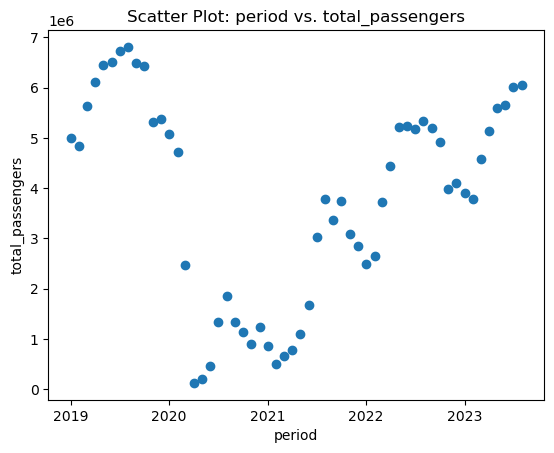

In [271]:
plt.scatter(schiphol_airport_df['period'], schiphol_airport_df['total_passengers'])
plt.xlabel('period')
plt.ylabel('total_passengers')
plt.title('Scatter Plot: period vs. total_passengers')
plt.show()

In [270]:
# Calculate covariance
covariance = schiphol_airport_df['total_flights'].cov(schiphol_airport_df['total_passengers'])

# Calculate correlation
correlation = schiphol_airport_df['total_flights'].corr(schiphol_airport_df['total_passengers'])

# Print results
print(f"Covariance between total_flights and total_passengers: {covariance}")
print(f"Correlation between total_flights and total_passengers: {correlation}")

Covariance between total_flights and total_passengers: 22168536348.904545
Correlation between total_flights and total_passengers: 0.9830411839826061


In [263]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
# Define your features (predictors) and target variable
X = schiphol_airport_df[['total_flights','total_passengers']] # Include relevant predictors
y = schiphol_airport_df['period']

In [265]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [267]:
#Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([1.62331521e+18, 1.62396985e+18, 1.62215732e+18, 1.62230982e+18,
       1.62095518e+18, 1.62118104e+18, 1.62165447e+18, 1.61547955e+18,
       1.62259612e+18, 1.62339900e+18, 1.62345502e+18, 1.62394038e+18])

In [268]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

UFuncTypeError: ufunc 'subtract' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

In [269]:



print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R²): {r2}')




# Optionally, I can save the trained model for future use
# from joblib import dump
# dump(model, 'passenger_prediction_model.joblib')


NameError: name 'mse' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Prepare the data and encode the 'Period' column
# Replace 'Period' encoding with appropriate method (label or one-hot encoding)
schiphol_airport_df = pd.get_dummies(schiphol_airport_df, columns=['period'], drop_first=True)

In [ ]:
# Split the data into features (X) and the target variable (y)
X = schiphol_airport_df[['total_flights', 'total_passengers']]
y = schiphol_airport_df.drop(['period'])

In [ ]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test data
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate the models
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Decision Tree Accuracy: {dt_accuracy}')
print(f'Random Forest Accuracy: {rf_accuracy}')

# You can also print classification reports for more details
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
